In [1]:
import pandas as pd

**LOAD & DESCRIBE THE DATASET**

In [2]:
df = pd.read_excel("Twitter+data+in+sheets.xlsx")
df

,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,Thursday,17.0,31.0,en,0.0,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17.0,31.0,en,1.0,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17.0,31.0,en,0.0,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17.0,31.0,en,0.0,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17.0,31.0,en,0.0,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,tw-716349615340199937,Saturday,13.0,2.0,en,0.0,763.0,0.0,0.0,29.0,0.0,I added a video to a @YouTube playlist https:/...,1332.0,tw-1143330170
99997,tw-716351557516722176,Saturday,13.0,2.0,en,1.0,122.0,435.0,0.0,17.0,1.0,RT @awscloud: Test your iOS Android &amp; web ...,1336.0,tw-139346924
99998,tw-716352501860196352,Saturday,13.0,2.0,en,1.0,287.0,30.0,0.0,42.0,0.0,RT @goserverless: Serverless Offline: Emulate ...,3795.0,tw-21826302
99999,tw-716352771209887744,Saturday,13.0,2.0,en,0.0,2422.0,1.0,0.0,34.0,3.0,Great turn out for the AWS Plant Sale and the ...,4007.0,tw-2286856224


In [ ]:
df.head()

,TweetID,Weekday,Hour,Day,Lang,IsReshare,Reach,RetweetCount,Likes,Klout,Sentiment,text,LocationID,UserID
0,tw-682712873332805633,Thursday,17.0,31.0,en,0.0,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Prot...,3751.0,tw-40932430
1,tw-682713045357998080,Thursday,17.0,31.0,en,1.0,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Se...,3989.0,tw-3179389829
2,tw-682713219375476736,Thursday,17.0,31.0,en,0.0,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ub...,3741.0,tw-4624808414
3,tw-682713436967579648,Thursday,17.0,31.0,en,0.0,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of o...,3753.0,tw-356447127
4,tw-682714048199311366,Thursday,17.0,31.0,en,0.0,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Mana...,3751.0,tw-3172686669


In [19]:
df.shape
print("Dataset Shape:", df.shape)

Dataset Shape: (100001, 14)


In [20]:
df.info()
print("\nDataset Info:")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TweetID        100000 non-null  object 
 1    Weekday       100000 non-null  object 
 2    Hour          100000 non-null  float64
 3    Day           100000 non-null  float64
 4    Lang          100000 non-null  object 
 5    IsReshare     100000 non-null  float64
 6    Reach         100000 non-null  float64
 7    RetweetCount  100000 non-null  float64
 8    Likes         100000 non-null  float64
 9    Klout         100000 non-null  float64
 10   Sentiment     100000 non-null  float64
 11   text          99996 non-null   object 
 12   LocationID    100000 non-null  float64
 13   UserID        100000 non-null  object 
dtypes: float64(9), object(5)
memory usage: 10.7+ MB

Dataset Info:


In [21]:
df.describe()
print("\nStatistical Summary:")


Statistical Summary:


 **HANDLE MISSING DATA**

**Check missing values**

In [79]:
df.isnull().sum()
print(df.isnull().sum())



TweetID         0
Weekday         0
Hour            0
Day             0
Lang            0
IsReshare       0
Reach           0
RetweetCount    0
Likes           0
Klout           0
Sentiment       0
text            0
LocationID      0
UserID          0
Engagement      0
Popular         0
dtype: int64


**Fill numerical missing values with median**

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

**Fill categorical missing values with mode**

In [24]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
   df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2835335291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
print("\nMissing values AFTER handling:")
print(df.isnull().sum())



Missing values AFTER handling:
TweetID          0
 Weekday         0
 Hour            0
 Day             0
 Lang            0
 IsReshare       0
 Reach           0
 RetweetCount    0
 Likes           0
 Klout           0
 Sentiment       0
 text            0
 LocationID      0
 UserID          0
dtype: int64


**FEATURE ENGINEERING**

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [29]:
df.columns = df.columns.str.strip()

df.columns
print("\nColumn Names:")



Column Names:


**Engagement feature**

In [30]:
df["Engagement"] = df["Likes"] + df["RetweetCount"]

In [31]:
print("New feature created: Engagement")

New feature created: Engagement


**HANDLE MISSING VALUES**

In [32]:
# Numerical columns
num_cols = ['Hour', 'Day', 'Reach', 'RetweetCount', 'Likes', 'Klout', 'Sentiment']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

#Categorical columns

cat_cols = ['Weekday', 'Lang', 'IsReshare']
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

In [33]:
print("\nMissing values AFTER handling:")
print(df.isnull().sum())



Missing values AFTER handling:
TweetID         0
Weekday         0
Hour            0
Day             0
Lang            0
IsReshare       0
Reach           0
RetweetCount    0
Likes           0
Klout           0
Sentiment       0
text            0
LocationID      0
UserID          0
Engagement      0
dtype: int64


**ENCODING CATEGORICAL FEATURES**

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Weekday', 'Lang']:
  df[col] = le.fit_transform(df[col])

**GRADIENT DESCENT (LINEAR REGRESSION)**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
X = df[['Klout', 'Reach', 'Hour']]
y = df['Likes']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [41]:
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)

In [42]:
print("MSE", mse)

MSE 5.91936325451938


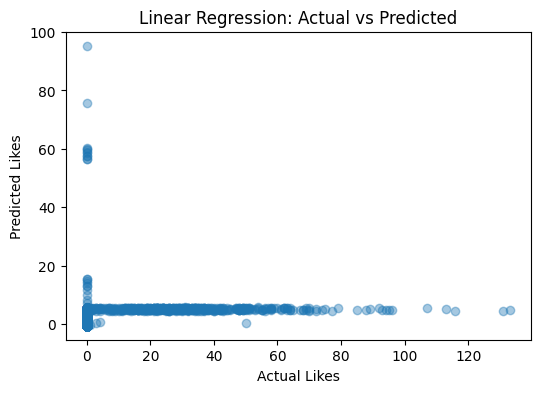

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, alpha=0.4)
plt.xlabel("Actual Likes")
plt.ylabel("Predicted Likes")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()



**DISTANCE-BASED ALGORITHM (KNN)**

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.metrics import accuracy_score

**Binary target**

In [48]:
df["Popular"] = (df["Likes"] > df["Likes"].median()).astype(int)


In [49]:
X = df[['Klout', 'Reach', 'Engagement']]
y = df['Popular']


In [50]:
X_train, X_test , y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 0.9979667344421853


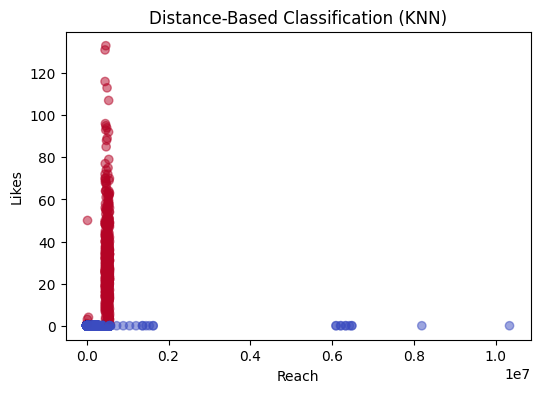

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(df['Reach'], df['Likes'], c=df['Popular'], cmap='coolwarm', alpha=0.5)
plt.xlabel("Reach")
plt.ylabel("Likes")
plt.title("Distance-Based Classification (KNN)")
plt.show()


**FILTER METHOD (Feature Selection without Model)**

In [56]:
df.columns = df.columns.str.strip()


In [57]:
X = df[['Hour', 'Day', 'Reach', 'RetweetCount', 'Klout']]
y = df['Likes']


**Correlation-based Filter**

In [62]:
# Correlation with target
correlation = df[['Hour', 'Day', 'Reach', 'RetweetCount', 'Klout', 'Likes']].corr()

# Sort by absolute correlation with Likes
correlation['Likes'].abs().sort_values(ascending=False)




,Likes
Likes,1.000000
Reach,0.328171
Klout,0.135158
Hour,0.020608
RetweetCount,0.017383
Day,0.005879


In [64]:
corr = df[['Hour', 'Day', 'Reach', 'RetweetCount', 'Klout', 'Likes']].corr()['Likes']

print("Correlation with Likes:")
print(corr.sort_values(ascending=False))


Correlation with Likes:
Likes           1.000000
Reach           0.328171
Klout           0.135158
Hour            0.020608
RetweetCount    0.017383
Day            -0.005879
Name: Likes, dtype: float64


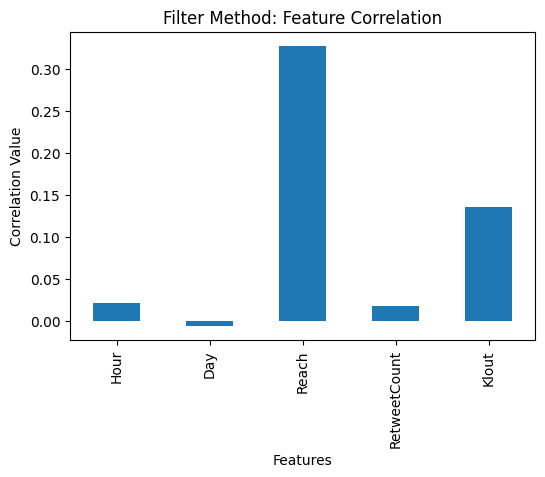

In [65]:
import matplotlib.pyplot as plt

corr.drop('Likes').plot(kind='bar', figsize=(6,4))
plt.title("Filter Method: Feature Correlation")
plt.ylabel("Correlation Value")
plt.xlabel("Features")
plt.show()




**Interpretation:**

**Features with higher correlation are more important**

**Example: Reach & RetweetCount usually rank highest**

**Variance Threshold Filter**

In [ ]:
from sklearn.feature_selection import VarianceThreshold


In [ ]:
vt = VarianceThreshold(threshold=0.01)
X_vt = vt.fit_transform(X)

In [ ]:
# Selected features
selected_features = X.columns[vt.get_support()]
print("Selected features (Variance Threshold):", selected_features.tolist())

Selected features (Variance Threshold): ['Hour', 'Day', 'Reach', 'RetweetCount', 'Klout']


**Why this works:**
**Removes features with almost no change**

**Such features add no predictive power**

**WRAPPER METHOD (Model-based Feature Selection)**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
remaining_features = list(X.columns)
selected_features = []
best_score = -1


In [ ]:
while remaining_features:
    scores_with_candidates = []

    for feature in remaining_features:
        features_to_test = selected_features + [feature]
        model = LinearRegression()
        score = cross_val_score(model, X[features_to_test], y, cv=5, scoring='r2').mean()
        scores_with_candidates.append((score, feature))

    scores_with_candidates.sort(reverse=True)
    best_new_score, best_feature = scores_with_candidates[0]

    if best_new_score > best_score:
        best_score = best_new_score
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break

print("Selected features (Wrapper Method):", selected_features)

Selected features (Wrapper Method): ['Reach', 'Klout', 'Hour', 'Day']


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

selected_features = []
remaining = list(X.columns)
best_score = -1

while remaining:
    scores = []
    for feature in remaining:
        feats = selected_features + [feature]
        score = cross_val_score(
            LinearRegression(), df[feats], y, cv=3, scoring='r2'
        ).mean()
        scores.append((score, feature))

    scores.sort(reverse=True)
    if scores[0][0] > best_score:
        best_score = scores[0][0]
        selected_features.append(scores[0][1])
        remaining.remove(scores[0][1])
    else:
        break

print("Wrapper Method Selected Features:", selected_features)


Wrapper Method Selected Features: ['Reach', 'Klout', 'Hour', 'Day']


**EMBEDDED METHOD (Feature Selection inside Model)**

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
from sklearn.linear_model import Lasso


In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_scaled, y)

Lasso(alpha=0.05)

In [72]:
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print(lasso_coef)

Hour            0.000000
Day            -0.000000
Reach           0.768756
RetweetCount    0.000000
Klout           0.148185
dtype: float64


**Selected Features (non-zero):**

In [ ]:
lasso_coef[lasso_coef != 0]


,0
Reach,0.768756
Klout,0.148185


**LASSO automatically removes unimportant features**

**Decision Tree (Embedded)**

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [75]:
# Feature importance
tree_importance = pd.Series(tree.feature_importances_, index=X.columns)
tree_importance.sort_values(ascending=False)

,0
Reach,0.540725
RetweetCount,0.287067
Hour,0.098412
Day,0.065306
Klout,0.008491


In [76]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

tree_imp = pd.Series(tree.feature_importances_, index=X.columns)
print("Decision Tree Feature Importance:")
print(tree_imp)


Decision Tree Feature Importance:
Hour            0.098412
Day             0.065306
Reach           0.540725
RetweetCount    0.287067
Klout           0.008491
dtype: float64


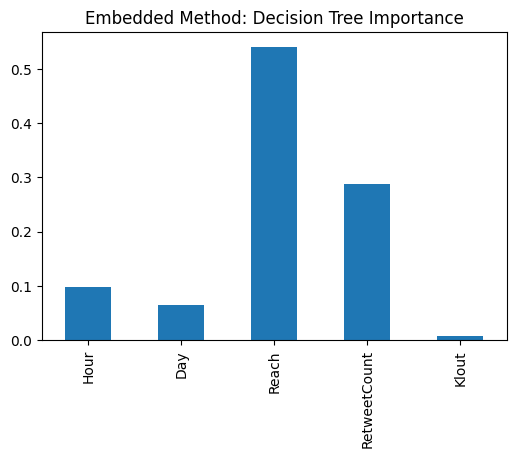

In [77]:
tree_imp.plot(kind='bar', figsize=(6,4))
plt.title("Embedded Method: Decision Tree Importance")
plt.show()
